# Relevance Plots


In [59]:
key_order = ['ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'TXThroughput', 'PLR', 'INDD', 'INHD', 'Speed']

from bounos.Analyses.Weight import build_outlier_weights, drop_metrics_from_weights_by_key, target_weight_feature_extractor, calc_correlations_from_weights


"/home/bolster/src/aietes/results/Malicious Behaviour Trust Comparison-2015-07-20-17-47-53"

observer = 'Bravo'
target = 'Alfa'
n_nodes = 6
n_metrics = 9

results_path = "/home/bolster/src/aietes/results/Malicious Behaviour Trust Comparison-2015-07-20-17-47-53"
outlier_path = results_path + "/outliers.bkup.h5"

Generate Dataframe mapping average outlier against metric weighting

In [3]:
outlier_weights = build_outlier_weights(outlier_path, observer=observer, target=target, 
                                        n_metrics=n_metrics, signed=False)

/CombinedTrust0_3
/CombinedTrust1_3
/CombinedTrust2_3


/home/bolster/src/aietes/src/bounos/Analyses/Weight.py:394: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  signed=False)


In [9]:
outlier_weights.head()

var                                                                    CombinedBadMouthingPowerControl  \
ADelay ARXP ATXP RXThroughput PLR TXThroughput INDD INHD     Speed                                       
0      0    0    0            0   0            0    0.000000 1.000000                         7.445617   
                                                             1.000000                        10.579884   
                                                             1.000000                         6.610557   
                                                    0.333333 0.666667                         3.630060   
                                                             0.666667                         5.771306   

var                                                                    CombinedSelfishTargetSelection  \
ADelay ARXP ATXP RXThroughput PLR TXThroughput INDD INHD     Speed                                      
0      0    0    0            0   0            0    0.000000 1.000000                       11.633371   
                                                             1.000000                       10.184113   
                                                             1.000000                        3.276866   
                                                    0.333333 0.666667                        5.339978   
                                                             0.666667                        5.006577   

var                                                                    CombinedTrust  \
ADelay ARXP ATXP RXThroughput PLR TXThroughput INDD INHD     Speed                     
0      0    0    0            0   0            0    0.000000 1.000000       7.209730   
                                                             1.000000       7.585360   
                                                             1.000000       6.279950   
                                                    0.333333 0.666667       3.309338   
                                                             0.666667       3.420793   

var                                                                       Shadow  \
ADelay ARXP ATXP RXThroughput PLR TXThroughput INDD INHD     Speed                 
0      0    0    0            0   0            0    0.000000 1.000000  14.679899   
                                                             1.000000  10.403014   
                                                             1.000000   9.840056   
                                                    0.333333 0.666667   6.678903   
                                                             0.666667   5.604625   

var                                                                    SlowCoach  
ADelay ARXP ATXP RXThroughput PLR TXThroughput INDD INHD     Speed                
0      0    0    0            0   0            0    0.000000 1.000000  33.726047  
                                                             1.000000  30.162833  
                                                             1.000000  26.036715  
                                                    0.333333 0.666667  13.593423  
                                                             0.666667  14.895794

In [5]:
from aietes.Tools import mkcpickle, uncpickle
mkcpickle("outlier_weights.pkl", outlier_weights)

<closed file 'outlier_weights.pkl', mode 'wb' at 0x7fa1639fc270>

Perform Regression and Feature Extraction; returns dict of Series's

In [7]:
outlier_feats =  target_weight_feature_extractor(outlier_weights)

CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach


In [18]:
print outlier_feats.keys()
outlier_feats['Shadow']

['CombinedTrust', 'Shadow', 'CombinedBadMouthingPowerControl', 'SlowCoach', 'CombinedSelfishTargetSelection']


var                              metric      
CombinedBadMouthingPowerControl  ADelay          0.025889
                                 ARXP            0.287290
                                 ATXP            0.362385
                                 INDD            0.050332
                                 INHD            0.040374
                                 PLR             0.047487
                                 RXThroughput    0.033222
                                 Speed           0.123960
                                 TXThroughput    0.029061
CombinedSelfishTargetSelection   ADelay          0.036200
                                 ARXP            0.501278
                                 ATXP            0.009903
                                 INDD            0.145230
                                 INHD            0.053044
                                 PLR             0.009829
                                 RXThroughput    0.049502
                          

In [17]:
def format_features(feats):
    alt_feats = pd.concat(feats, names=['base', 'comp', 'metric']).unstack('metric')
    alt_feats.index.set_levels(
        [[u'MPC', u'STS', u'Fair', u'Shadow', u'SlowCoach'], [u'MPC', u'STS', u'Fair', u'Shadow', u'SlowCoach']],
        inplace=True)
    return alt_feats


Reformat features to single dataframe and rename indexes

In [21]:
outlier_feats_formatted = format_features(outlier_feats)
outlier_feats_formatted

metric                 ADelay      ARXP      ATXP      INDD      INHD  \
base      comp                                                          
MPC       MPC        0.000000  0.000000  0.000000  0.000000  0.000000   
          STS        0.027810  0.134963  0.423927  0.057288  0.052140   
          Fair       0.032017  0.153763  0.497022  0.048147  0.037763   
          Shadow     0.025860  0.287517  0.360883  0.050346  0.040831   
          SlowCoach  0.022627  0.276667  0.183020  0.044402  0.092456   
STS       MPC        0.028585  0.133911  0.423699  0.056646  0.052899   
          STS        0.000000  0.000000  0.000000  0.000000  0.000000   
          Fair       0.104828  0.041556  0.010058  0.196669  0.048659   
          Shadow     0.036676  0.502610  0.009813  0.144796  0.052480   
          SlowCoach  0.031352  0.351927  0.008991  0.128627  0.092227   
Fair      MPC        0.032480  0.153353  0.496911  0.048059  0.038502   
          STS        0.106269  0.041968  0.010159  0.197196  0.047863   
          Fair       0.000000  0.000000  0.000000  0.000000  0.000000   
          Shadow     0.018317  0.654441  0.006985  0.081928  0.055055   
          SlowCoach  0.039701  0.369950  0.008623  0.088822  0.099563   
Shadow    MPC        0.025889  0.287290  0.362385  0.050332  0.040374   
          STS        0.036200  0.501278  0.009903  0.145230  0.053044   
          Fair       0.018499  0.655777  0.007118  0.080762  0.054874   
          Shadow     0.000000  0.000000  0.000000  0.000000  0.000000   
          SlowCoach  0.061235  0.181060  0.011854  0.104316  0.126480   
SlowCoach MPC        0.022838  0.276040  0.182475  0.044487  0.091647   
          STS        0.031452  0.350767  0.008940  0.128655  0.093338   
          Fair       0.040331  0.371131  0.008739  0.088423  0.098790   
          Shadow     0.061929  0.182681  0.011729  0.103153  0.126058   
          SlowCoach  0.000000  0.000000  0.000000  0.000000  0.000000   

metric                    PLR  RXThroughput     Speed  TXThroughput  
base      comp                                                       
MPC       MPC        0.000000      0.000000  0.000000      0.000000  
          STS        0.051665      0.041475  0.112741      0.097991  
          Fair       0.061795      0.033978  0.100909      0.034607  
          Shadow     0.047122      0.033120  0.125172      0.029149  
          SlowCoach  0.022252      0.031363  0.304430      0.022782  
STS       MPC        0.051131      0.041161  0.113771      0.098199  
          STS        0.000000      0.000000  0.000000      0.000000  
          Fair       0.010015      0.093152  0.056215      0.438849  
          Shadow     0.009814      0.049246  0.101611      0.092953  
          SlowCoach  0.008927      0.038671  0.292860      0.046418  
Fair      MPC        0.061850      0.034112  0.100110      0.034623  
          STS        0.010078      0.094382  0.054926      0.437158  
          Fair       0.000000      0.000000  0.000000      0.000000  
          Shadow     0.007107      0.029095  0.126202      0.020871  
          SlowCoach  0.008643      0.040749  0.318719      0.025229  
Shadow    MPC        0.047487      0.033222  0.123960      0.029061  
          STS        0.009829      0.049502  0.101655      0.093359  
          Fair       0.007178      0.029814  0.124957      0.021022  
          Shadow     0.000000      0.000000  0.000000      0.000000  
          SlowCoach  0.011859      0.052762  0.416657      0.033776  
SlowCoach MPC        0.022294      0.031332  0.306004      0.022882  
          STS        0.009012      0.038595  0.292347      0.046894  
          Fair       0.008718      0.041082  0.317390      0.025395  
          Shadow     0.011863      0.053752  0.415134      0.033701  
          SlowCoach  0.000000      0.000000  0.000000      0.000000

# And with SubSet of Metrics?

Need to cycle through combinations of metric subsets.

Order does not matter (hopefully, possibly good cross-check?)

Start off with proposed visually inspected subgroups, i.e. 

Comms'= P_tx PLR Tp INDD
Phy' = INDD, Delay, P_rx, INHD, Speed

In [53]:
phys_keys = ['INDD', 'INHD', 'Speed']
comm_keys = ['ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'TXThroughput', 'PLR']

comm_keys_alt = ['ATXP', 'RXThroughput', 'TXThroughput', 'PLR','INDD']
phys_keys_alt = ['ADelay','ARXP', 'INDD', 'INHD', 'Speed']

def metric_key_inverter(desired_keys):
    drop_keys = sorted(list(set(key_order).difference(desired_keys)),key=lambda x: key_order.index(x))
    return drop_keys


CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach
CPU times: user 36.1 s, sys: 1.1 s, total: 37.2 s
Wall time: 20.4 s


CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach
0.0889630252547
CPU times: user 4.61 s, sys: 156 ms, total: 4.76 s
Wall time: 8.22 s


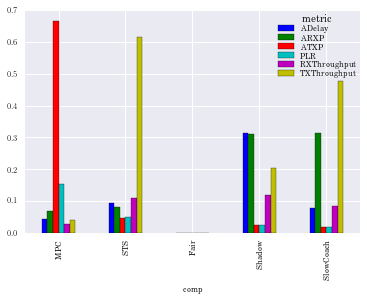

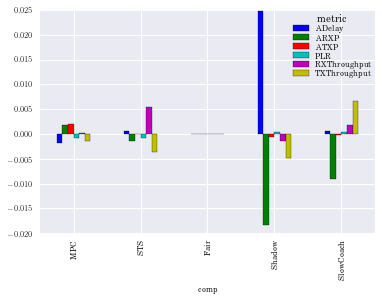

In [92]:
%%time
comms_only_weights = drop_metrics_from_weights_by_key(
    outlier_weights, metric_key_inverter(comm_keys))
comms_only_feats = format_features(target_weight_feature_extractor(comms_only_weights, n_estimators=128))

comms_only_feats.loc['Fair'].plot(kind='bar')
baseline_fair_comms_only - comms_only_feats.loc['Fair']
(baseline_fair_comms_only - comms_only_feats.loc['Fair']).plot(kind='bar')
print (baseline_fair_comms_only - comms_only_feats.loc['Fair']).abs().sum().sum()

In [84]:
(baseline_fair_comms_only - comms_only_feats.loc['Fair']).abs().sum().sum()

0.027684026771568997

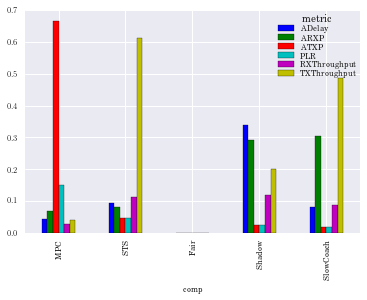

In [65]:
baseline_fair_comms_only = comms_only_feats.loc['Fair']
baseline_fair_comms_only.plot(kind='bar')

In [118]:
comms_only_feats.xs('Fair', drop_level=False)

metric            ADelay      ARXP      ATXP       PLR  RXThroughput  \
base comp                                                              
Fair MPC        0.045686  0.068280  0.663977  0.152721      0.027514   
     STS        0.094648  0.082507  0.048885  0.049572      0.109212   
     Fair       0.000000  0.000000  0.000000  0.000000      0.000000   
     Shadow     0.313608  0.310450  0.026499  0.024322      0.119614   
     SlowCoach  0.080076  0.314654  0.020450  0.019808      0.086607   

metric          TXThroughput  
base comp                     
Fair MPC            0.041822  
     STS            0.615175  
     Fair           0.000000  
     Shadow         0.205506  
     SlowCoach      0.478404

In [94]:
from aietes.Tools import powerset
from collections import defaultdict
d_subsets_feats = defaultdict()

In [98]:
for i, subset in enumerate(powerset(key_order)):
    if len(subset) > 4 and subset not in d_subsets_feats:
        try:
            sub_only_weights = drop_metrics_from_weights_by_key(outlier_weights, metric_key_inverter(subset))
            sub_set_feat = format_features(target_weight_feature_extractor(sub_only_weights, n_estimators=128))
        except: 
            print "failed on {} {}".format(i,subset)
        d_subsets_feats[subset] = sub_set_feat.copy()
        print i, subset


CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach
256 ('ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'TXThroughput')
CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach
257 ('ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'PLR')
CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach
258 ('ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'INDD')
CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach
259 ('ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'INHD')
CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach
260 ('ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'Speed')
CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach
261 ('ADelay', 'ARXP', 'ATXP', 'TXThroughput', 'PLR')
CombinedBadMouthingPowerControl
CombinedSelfishTargetSelection
CombinedTrust
Shadow
SlowCoach
262 (

In [99]:
mkcpickle("d_subsets_feat.pkl", d_subsets_feats)

<closed file 'd_subsets_feat.pkl', mode 'wb' at 0x7fa161631300>

In [105]:
d_subsets_feats = dict(d_subsets_feats)

In [108]:
del d_subsets_feats[('ADelay',)]

In [130]:
d_subsets_feats[tuple(comm_keys)].xs('Fair', drop_level=False)

metric            ADelay      ARXP      ATXP       PLR  RXThroughput  \
base comp                                                              
Fair MPC        0.042527  0.069523  0.666134  0.156598      0.026322   
     STS        0.095854  0.081895  0.048977  0.048278      0.115789   
     Fair       0.000000  0.000000  0.000000  0.000000      0.000000   
     Shadow     0.346391  0.287355  0.026766  0.024018      0.119295   
     SlowCoach  0.082235  0.305811  0.019691  0.019630      0.088565   

metric          TXThroughput  
base comp                     
Fair MPC            0.038895  
     STS            0.609207  
     Fair           0.000000  
     Shadow         0.196175  
     SlowCoach      0.484066

In [125]:
comms_only_feats

metric                 ADelay      ARXP      ATXP       PLR  RXThroughput  \
base      comp                                                              
MPC       MPC        0.000000  0.000000  0.000000  0.000000      0.000000   
          STS        0.036773  0.075508  0.623265  0.138478      0.036176   
          Fair       0.041973  0.070971  0.666051  0.152265      0.028108   
          Shadow     0.042800  0.067861  0.667276  0.155975      0.028450   
          SlowCoach  0.045374  0.054525  0.677810  0.164656      0.025878   
STS       MPC        0.035588  0.077058  0.621486  0.143442      0.036108   
          STS        0.000000  0.000000  0.000000  0.000000      0.000000   
          Fair       0.102420  0.083322  0.047268  0.047015      0.115461   
          Shadow     0.108321  0.096480  0.047496  0.046261      0.087932   
          SlowCoach  0.052270  0.165981  0.028969  0.028199      0.059257   
Fair      MPC        0.045686  0.068280  0.663977  0.152721      0.027514   
          STS        0.094648  0.082507  0.048885  0.049572      0.109212   
          Fair       0.000000  0.000000  0.000000  0.000000      0.000000   
          Shadow     0.313608  0.310450  0.026499  0.024322      0.119614   
          SlowCoach  0.080076  0.314654  0.020450  0.019808      0.086607   
Shadow    MPC        0.043701  0.067410  0.666852  0.153026      0.029448   
          STS        0.114711  0.098924  0.042279  0.040530      0.095382   
          Fair       0.326709  0.309211  0.027095  0.024090      0.115358   
          Shadow     0.000000  0.000000  0.000000  0.000000      0.000000   
          SlowCoach  0.113866  0.289554  0.023102  0.023524      0.061094   
SlowCoach MPC        0.048992  0.054901  0.672888  0.162272      0.026311   
          STS        0.047478  0.163497  0.030686  0.030614      0.054114   
          Fair       0.083102  0.308338  0.019360  0.019127      0.087953   
          Shadow     0.112622  0.281820  0.024384  0.023291      0.061192   
          SlowCoach  0.000000  0.000000  0.000000  0.000000      0.000000   

metric               TXThroughput  
base      comp                     
MPC       MPC            0.000000  
          STS            0.089800  
          Fair           0.040632  
          Shadow         0.037638  
          SlowCoach      0.031757  
STS       MPC            0.086318  
          STS            0.000000  
          Fair           0.604514  
          Shadow         0.613510  
          SlowCoach      0.665324  
Fair      MPC            0.041822  
          STS            0.615175  
          Fair           0.000000  
          Shadow         0.205506  
          SlowCoach      0.478404  
Shadow    MPC            0.039564  
          STS            0.608174  
          Fair           0.197537  
          Shadow         0.000000  
          SlowCoach      0.488860  
SlowCoach MPC            0.034637  
          STS            0.673611  
          Fair           0.482119  
          Shadow         0.496691  
          SlowCoach      0.000000

In [132]:
from aietes.Tools import uncpickle
best_full_runs = uncpickle('/home/bolster/src/thesis/papers/active/16_AAMAS/best_full_runs')

In [144]:
optimal_full_weights = pd.DataFrame.from_dict({ k: v[1] for k,v in best_full_runs['Fair'].iteritems()}).T

In [145]:
optimal_full_weights.columns = key_order

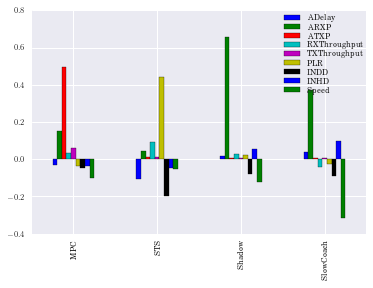

In [147]:
optimal_full_weights.plot(kind='bar')

In [150]:
clean_dataset = "Malicious Behaviour Trust AAMAS Control-2015-11-09-16-00-15"
from aietes.Tools import in_results
import os

In [151]:
os.listdir(in_results(clean_dataset))

['Behaviour(SlowCoach)',
 'Behaviour(Shadow)',
 'Application(CombinedBadMouthingPowerControl)',
 'Application(CombinedSelfishTargetSelection)',
 'Application(CombinedTrust)']

In [152]:
# Inverted results from Test_thesis_diagrams.Validation

inverted_results = uncpickle("/dev/shm/inverted_results")

In [228]:
perfd = defaultdict()
for subset_str, results in inverted_results.items():
    rd = {k:v for k,v in results}
    df = pd.concat([v for _, v in rd.items()], keys=rd.keys(), names=['bev','var','t'])

    df_mean = df.groupby(level='bev').agg(np.nanmean)
    perfd[subset_str] = df_mean.drop('Alfa', axis=1).apply(np.nanmean, axis=1) - df_mean['Alfa']

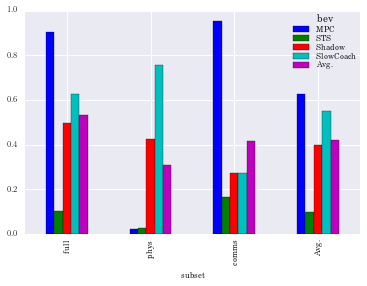

In [250]:
df = pd.concat([v for _, v in perfd.items()], keys=perfd.keys(), names=['subset','bev']).unstack('bev')
df['Avg.']=df.mean(axis=1)
df = df.append(pd.Series(df.mean(axis=0), name='Avg.'))
df.plot(kind='bar')

In [247]:
for subset_str, results in inverted_results.items():
    for target_str, result in results:
        print target_str
        break

STS
MPC
SlowCoach


In [252]:
df.rename(str.capitalize)

bev,MPC,STS,Shadow,SlowCoach,Avg.
subset,,,,,
Full,0.904669,0.102253,0.498913,0.628002,0.533459
Phys,0.022065,0.024880,0.425360,0.757990,0.307574
Comms,0.954552,0.166297,0.275106,0.271373,0.416832
Avg.,0.627096,0.097810,0.399793,0.552455,0.419288


In [262]:
with open('/home/bolster/src/thesis/Figures/input/domain_deltas.tex', 'r') as f:
    r = f.readlines()

In [263]:
r.insert(-3, '\hline')

In [264]:
r,

['\\begin{tabular}{lrrrrr}\n',
 '\\toprule\n',
 '\\diagbox{Domain}{Behaviour} &  MPC &  STS &  Shadow &  SlowCoach &  Avg. \\\\\n',
 'subset &      &      &         &            &       \\\\\n',
 '\\midrule\n',
 'Full   & 0.90 & 0.10 &    0.50 &       0.63 &  0.53 \\\\\n',
 'Phys   & 0.02 & 0.02 &    0.43 &       0.76 &  0.31 \\\\\n',
 'Comms  & 0.95 & 0.17 &    0.28 &       0.27 &  0.42 \\\\\n',
 '\\hline',
 'Avg.   & 0.63 & 0.10 &    0.40 &       0.55 &  0.42 \\\\\n',
 '\\bottomrule\n',
 '\\end{tabular}\n']